# Automação de Processos

## Problema a ser resolvido

- Buscar de forma automática, informações de ações de bolsa de valores
- Criar as análises solicitadas pelo Gestor
- Enviar automáticamente, um email com os resultados das análises

## Bibliotecas

In [3]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install pyautogui

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.2 kB 217.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.2 kB 217.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.2 kB 245.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 260.9 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 217.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirem

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
!pip install pyperclip

Defaulting to user installation because normal site-packages is not writeable


## Buscar informações de ações

In [4]:
import yfinance

In [15]:
codigo = input("digite o código da ação: ")
dados = yfinance.Ticker(codigo).history("6mo")

digite o código da ação: IBM


In [16]:
Fechamento = dados.Close

In [17]:
Abertura = dados.Open

In [18]:
Fechamento

Date
2023-04-21 00:00:00-04:00    122.627487
2023-04-24 00:00:00-04:00    122.305634
2023-04-25 00:00:00-04:00    122.783539
2023-04-26 00:00:00-04:00    122.744530
2023-04-27 00:00:00-04:00    123.836891
                                ...    
2023-10-16 00:00:00-04:00    139.210007
2023-10-17 00:00:00-04:00    140.320007
2023-10-18 00:00:00-04:00    139.970001
2023-10-19 00:00:00-04:00    138.009995
2023-10-20 00:00:00-04:00    137.160004
Name: Close, Length: 127, dtype: float64

In [19]:
Abertura

Date
2023-04-21 00:00:00-04:00    122.890821
2023-04-24 00:00:00-04:00    122.451934
2023-04-25 00:00:00-04:00    121.817970
2023-04-26 00:00:00-04:00    122.705516
2023-04-27 00:00:00-04:00    123.251698
                                ...    
2023-10-16 00:00:00-04:00    139.279999
2023-10-17 00:00:00-04:00    137.119995
2023-10-18 00:00:00-04:00    140.000000
2023-10-19 00:00:00-04:00    138.639999
2023-10-20 00:00:00-04:00    138.149994
Name: Open, Length: 127, dtype: float64

<Axes: xlabel='Date'>

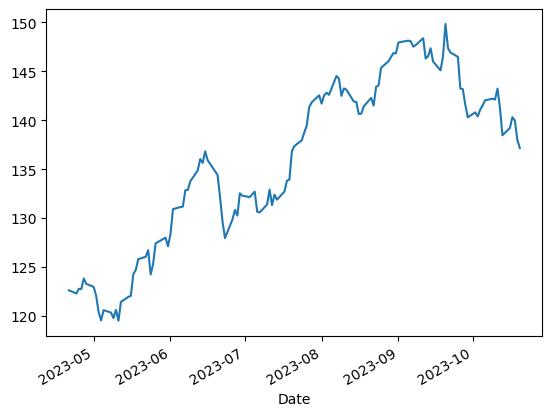

In [20]:
Fechamento.plot()

<Axes: xlabel='Date'>

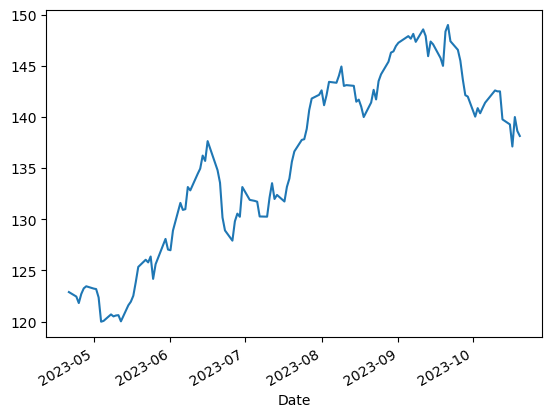

In [21]:
Abertura.plot()

## Gerar Análises

- 6 meses
- Cotação Máxima
- Cotação Mínima
- Cotação Atual

In [23]:
maxima = round(Fechamento.max(),2)

In [24]:
minima = round(Fechamento.min(),2)

In [25]:
atual = round(Fechamento[-1],2)

In [26]:
print(maxima)
print(minima)
print(atual)

149.83
119.52
137.16


## Enviar e-mail automaticamente

- Abrir uma nova aba (ctrl +t)
- Digitar o endereço do Outlook
- Clicar entrar
- Clicar no botão escrever
- Preencher o destinatário (clicar tab)
- Preencher o assunto (clicar tab)
- Preencher o corpo do e-mail
- Clicar no botão enviar


In [7]:
import pyautogui
import pyperclip

In [43]:
# configurando o Pyautogui para dar uma pausa de 3 segundos entre os passos
pyautogui.PAUSE = 3

# abrir uma nova aba (ctrl + t)
pyautogui.hotkey("ctrl", "t")

# digitar o endereço do outlook
pyperclip.copy("www.outlook.com.br")
pyautogui.hotkey("ctrl","v")
pyautogui.hotkey("enter")

# clicar no botão escrever
pyautogui.click(x=135, y=232)

# Preencher o destinatário (clicar tab)

pyperclip.copy("renatofn418@yahoo.com")
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# Preencher o assunto (clicar tab)
pyperclip.copy("Análises diárias")
pyautogui.hotkey("ctrl", "v")
pyautogui.hotkey("tab")

# Preencher o corpo do e-mail

mensagem = f"""
Prezado Gestor,
Prezado Gestor,

Seguem as análises diárias da ação IBM referente aos últimos 6 meses:

Cotação máxima: R$149.83
Cotação mínima: R$119.52
Cotação atual: R$137.16

Qualquer dúvida estou à disposição!

Seguem as análises diárias da ação {codigo} referente aos últimos 6 meses:

Cotação máxima: R${maxima}
Cotação mínima: R${minima}
Cotação atual: R${atual}

Qualquer dúvida estou à disposição!"""

pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl", "v")

# Clicar no boão enviar

pyautogui.click(x=504, y=283)

In [41]:
import time

time.sleep(5)
pyautogui.position()

Point(x=504, y=283)